# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (Check inside your classroom for a discount code)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem" (this lesson)

- [Curate a Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Quick Theory Validation](#project_1)


- [Transforming Text to Numbers](#lesson_3)
- [**PROJECT 2**: Creating the Input/Output Data](#project_2)


- Putting it all together in a Neural Network (video only - nothing in notebook)
- [**PROJECT 3**: Building our Neural Network](#project_3)


- [Understanding Neural Noise](#lesson_4)
- [**PROJECT 4**: Making Learning Faster by Reducing Noise](#project_4)


- [Analyzing Inefficiencies in our Network](#lesson_5)
- [**PROJECT 5**: Making our Network Train and Run Faster](#project_5)


- [Further Noise Reduction](#lesson_6)
- [**PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary](#project_6)


- [Analysis: What's going on in the weights?](#lesson_7)

# Lesson: Curate a Dataset<a id='lesson_1'></a>
The cells from here until Project 1 include code Andrew shows in the videos leading up to mini project 1. We've included them so you can run the code along with the videos without having to type in everything.

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory<a id='lesson_2'></a>

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [6]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [7]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results than what the videos and solutions show.

In [16]:
# TODO: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for i, (rev, lab) in enumerate(zip(reviews, labels)):
    print(f'Round {i}')
    rev_split = rev.split(' ')
    
    if lab=='NEGATIVE':
        negative_counts += Counter(rev_split)
    else:
        positive_counts += Counter(rev_split)
        
total_counts = negative_counts + positive_counts

Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
Round 8
Round 9
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23
Round 24
Round 25
Round 26
Round 27
Round 28
Round 29
Round 30
Round 31
Round 32
Round 33
Round 34
Round 35
Round 36
Round 37
Round 38
Round 39
Round 40
Round 41
Round 42
Round 43
Round 44
Round 45
Round 46
Round 47
Round 48
Round 49
Round 50
Round 51
Round 52
Round 53
Round 54
Round 55
Round 56
Round 57
Round 58
Round 59
Round 60
Round 61
Round 62
Round 63
Round 64
Round 65
Round 66
Round 67
Round 68
Round 69
Round 70
Round 71
Round 72
Round 73
Round 74
Round 75
Round 76
Round 77
Round 78
Round 79
Round 80
Round 81
Round 82
Round 83
Round 84
Round 85
Round 86
Round 87
Round 88
Round 89
Round 90
Round 91
Round 92
Round 93
Round 94
Round 95
Round 96
Round 97
Round 98
Round 99
Round 100
Round 101
Round 102
Round 103
Round 104
Round 105
Round 106
Round 107
Round 108
Round 109
Round 110


Round 1598
Round 1599
Round 1600
Round 1601
Round 1602
Round 1603
Round 1604
Round 1605
Round 1606
Round 1607
Round 1608
Round 1609
Round 1610
Round 1611
Round 1612
Round 1613
Round 1614
Round 1615
Round 1616
Round 1617
Round 1618
Round 1619
Round 1620
Round 1621
Round 1622
Round 1623
Round 1624
Round 1625
Round 1626
Round 1627
Round 1628
Round 1629
Round 1630
Round 1631
Round 1632
Round 1633
Round 1634
Round 1635
Round 1636
Round 1637
Round 1638
Round 1639
Round 1640
Round 1641
Round 1642
Round 1643
Round 1644
Round 1645
Round 1646
Round 1647
Round 1648
Round 1649
Round 1650
Round 1651
Round 1652
Round 1653
Round 1654
Round 1655
Round 1656
Round 1657
Round 1658
Round 1659
Round 1660
Round 1661
Round 1662
Round 1663
Round 1664
Round 1665
Round 1666
Round 1667
Round 1668
Round 1669
Round 1670
Round 1671
Round 1672
Round 1673
Round 1674
Round 1675
Round 1676
Round 1677
Round 1678
Round 1679
Round 1680
Round 1681
Round 1682
Round 1683
Round 1684
Round 1685
Round 1686
Round 1687
Round 1688

Round 2597
Round 2598
Round 2599
Round 2600
Round 2601
Round 2602
Round 2603
Round 2604
Round 2605
Round 2606
Round 2607
Round 2608
Round 2609
Round 2610
Round 2611
Round 2612
Round 2613
Round 2614
Round 2615
Round 2616
Round 2617
Round 2618
Round 2619
Round 2620
Round 2621
Round 2622
Round 2623
Round 2624
Round 2625
Round 2626
Round 2627
Round 2628
Round 2629
Round 2630
Round 2631
Round 2632
Round 2633
Round 2634
Round 2635
Round 2636
Round 2637
Round 2638
Round 2639
Round 2640
Round 2641
Round 2642
Round 2643
Round 2644
Round 2645
Round 2646
Round 2647
Round 2648
Round 2649
Round 2650
Round 2651
Round 2652
Round 2653
Round 2654
Round 2655
Round 2656
Round 2657
Round 2658
Round 2659
Round 2660
Round 2661
Round 2662
Round 2663
Round 2664
Round 2665
Round 2666
Round 2667
Round 2668
Round 2669
Round 2670
Round 2671
Round 2672
Round 2673
Round 2674
Round 2675
Round 2676
Round 2677
Round 2678
Round 2679
Round 2680
Round 2681
Round 2682
Round 2683
Round 2684
Round 2685
Round 2686
Round 2687

Round 4096
Round 4097
Round 4098
Round 4099
Round 4100
Round 4101
Round 4102
Round 4103
Round 4104
Round 4105
Round 4106
Round 4107
Round 4108
Round 4109
Round 4110
Round 4111
Round 4112
Round 4113
Round 4114
Round 4115
Round 4116
Round 4117
Round 4118
Round 4119
Round 4120
Round 4121
Round 4122
Round 4123
Round 4124
Round 4125
Round 4126
Round 4127
Round 4128
Round 4129
Round 4130
Round 4131
Round 4132
Round 4133
Round 4134
Round 4135
Round 4136
Round 4137
Round 4138
Round 4139
Round 4140
Round 4141
Round 4142
Round 4143
Round 4144
Round 4145
Round 4146
Round 4147
Round 4148
Round 4149
Round 4150
Round 4151
Round 4152
Round 4153
Round 4154
Round 4155
Round 4156
Round 4157
Round 4158
Round 4159
Round 4160
Round 4161
Round 4162
Round 4163
Round 4164
Round 4165
Round 4166
Round 4167
Round 4168
Round 4169
Round 4170
Round 4171
Round 4172
Round 4173
Round 4174
Round 4175
Round 4176
Round 4177
Round 4178
Round 4179
Round 4180
Round 4181
Round 4182
Round 4183
Round 4184
Round 4185
Round 4186

Round 6095
Round 6096
Round 6097
Round 6098
Round 6099
Round 6100
Round 6101
Round 6102
Round 6103
Round 6104
Round 6105
Round 6106
Round 6107
Round 6108
Round 6109
Round 6110
Round 6111
Round 6112
Round 6113
Round 6114
Round 6115
Round 6116
Round 6117
Round 6118
Round 6119
Round 6120
Round 6121
Round 6122
Round 6123
Round 6124
Round 6125
Round 6126
Round 6127
Round 6128
Round 6129
Round 6130
Round 6131
Round 6132
Round 6133
Round 6134
Round 6135
Round 6136
Round 6137
Round 6138
Round 6139
Round 6140
Round 6141
Round 6142
Round 6143
Round 6144
Round 6145
Round 6146
Round 6147
Round 6148
Round 6149
Round 6150
Round 6151
Round 6152
Round 6153
Round 6154
Round 6155
Round 6156
Round 6157
Round 6158
Round 6159
Round 6160
Round 6161
Round 6162
Round 6163
Round 6164
Round 6165
Round 6166
Round 6167
Round 6168
Round 6169
Round 6170
Round 6171
Round 6172
Round 6173
Round 6174
Round 6175
Round 6176
Round 6177
Round 6178
Round 6179
Round 6180
Round 6181
Round 6182
Round 6183
Round 6184
Round 6185

Round 6900
Round 6901
Round 6902
Round 6903
Round 6904
Round 6905
Round 6906
Round 6907
Round 6908
Round 6909
Round 6910
Round 6911
Round 6912
Round 6913
Round 6914
Round 6915
Round 6916
Round 6917
Round 6918
Round 6919
Round 6920
Round 6921
Round 6922
Round 6923
Round 6924
Round 6925
Round 6926
Round 6927
Round 6928
Round 6929
Round 6930
Round 6931
Round 6932
Round 6933
Round 6934
Round 6935
Round 6936
Round 6937
Round 6938
Round 6939
Round 6940
Round 6941
Round 6942
Round 6943
Round 6944
Round 6945
Round 6946
Round 6947
Round 6948
Round 6949
Round 6950
Round 6951
Round 6952
Round 6953
Round 6954
Round 6955
Round 6956
Round 6957
Round 6958
Round 6959
Round 6960
Round 6961
Round 6962
Round 6963
Round 6964
Round 6965
Round 6966
Round 6967
Round 6968
Round 6969
Round 6970
Round 6971
Round 6972
Round 6973
Round 6974
Round 6975
Round 6976
Round 6977
Round 6978
Round 6979
Round 6980
Round 6981
Round 6982
Round 6983
Round 6984
Round 6985
Round 6986
Round 6987
Round 6988
Round 6989
Round 6990

Round 8077
Round 8078
Round 8079
Round 8080
Round 8081
Round 8082
Round 8083
Round 8084
Round 8085
Round 8086
Round 8087
Round 8088
Round 8089
Round 8090
Round 8091
Round 8092
Round 8093
Round 8094
Round 8095
Round 8096
Round 8097
Round 8098
Round 8099
Round 8100
Round 8101
Round 8102
Round 8103
Round 8104
Round 8105
Round 8106
Round 8107
Round 8108
Round 8109
Round 8110
Round 8111
Round 8112
Round 8113
Round 8114
Round 8115
Round 8116
Round 8117
Round 8118
Round 8119
Round 8120
Round 8121
Round 8122
Round 8123
Round 8124
Round 8125
Round 8126
Round 8127
Round 8128
Round 8129
Round 8130
Round 8131
Round 8132
Round 8133
Round 8134
Round 8135
Round 8136
Round 8137
Round 8138
Round 8139
Round 8140
Round 8141
Round 8142
Round 8143
Round 8144
Round 8145
Round 8146
Round 8147
Round 8148
Round 8149
Round 8150
Round 8151
Round 8152
Round 8153
Round 8154
Round 8155
Round 8156
Round 8157
Round 8158
Round 8159
Round 8160
Round 8161
Round 8162
Round 8163
Round 8164
Round 8165
Round 8166
Round 8167

Round 9456
Round 9457
Round 9458
Round 9459
Round 9460
Round 9461
Round 9462
Round 9463
Round 9464
Round 9465
Round 9466
Round 9467
Round 9468
Round 9469
Round 9470
Round 9471
Round 9472
Round 9473
Round 9474
Round 9475
Round 9476
Round 9477
Round 9478
Round 9479
Round 9480
Round 9481
Round 9482
Round 9483
Round 9484
Round 9485
Round 9486
Round 9487
Round 9488
Round 9489
Round 9490
Round 9491
Round 9492
Round 9493
Round 9494
Round 9495
Round 9496
Round 9497
Round 9498
Round 9499
Round 9500
Round 9501
Round 9502
Round 9503
Round 9504
Round 9505
Round 9506
Round 9507
Round 9508
Round 9509
Round 9510
Round 9511
Round 9512
Round 9513
Round 9514
Round 9515
Round 9516
Round 9517
Round 9518
Round 9519
Round 9520
Round 9521
Round 9522
Round 9523
Round 9524
Round 9525
Round 9526
Round 9527
Round 9528
Round 9529
Round 9530
Round 9531
Round 9532
Round 9533
Round 9534
Round 9535
Round 9536
Round 9537
Round 9538
Round 9539
Round 9540
Round 9541
Round 9542
Round 9543
Round 9544
Round 9545
Round 9546

Round 11092
Round 11093
Round 11094
Round 11095
Round 11096
Round 11097
Round 11098
Round 11099
Round 11100
Round 11101
Round 11102
Round 11103
Round 11104
Round 11105
Round 11106
Round 11107
Round 11108
Round 11109
Round 11110
Round 11111
Round 11112
Round 11113
Round 11114
Round 11115
Round 11116
Round 11117
Round 11118
Round 11119
Round 11120
Round 11121
Round 11122
Round 11123
Round 11124
Round 11125
Round 11126
Round 11127
Round 11128
Round 11129
Round 11130
Round 11131
Round 11132
Round 11133
Round 11134
Round 11135
Round 11136
Round 11137
Round 11138
Round 11139
Round 11140
Round 11141
Round 11142
Round 11143
Round 11144
Round 11145
Round 11146
Round 11147
Round 11148
Round 11149
Round 11150
Round 11151
Round 11152
Round 11153
Round 11154
Round 11155
Round 11156
Round 11157
Round 11158
Round 11159
Round 11160
Round 11161
Round 11162
Round 11163
Round 11164
Round 11165
Round 11166
Round 11167
Round 11168
Round 11169
Round 11170
Round 11171
Round 11172
Round 11173
Round 11174
Roun

Round 12270
Round 12271
Round 12272
Round 12273
Round 12274
Round 12275
Round 12276
Round 12277
Round 12278
Round 12279
Round 12280
Round 12281
Round 12282
Round 12283
Round 12284
Round 12285
Round 12286
Round 12287
Round 12288
Round 12289
Round 12290
Round 12291
Round 12292
Round 12293
Round 12294
Round 12295
Round 12296
Round 12297
Round 12298
Round 12299
Round 12300
Round 12301
Round 12302
Round 12303
Round 12304
Round 12305
Round 12306
Round 12307
Round 12308
Round 12309
Round 12310
Round 12311
Round 12312
Round 12313
Round 12314
Round 12315
Round 12316
Round 12317
Round 12318
Round 12319
Round 12320
Round 12321
Round 12322
Round 12323
Round 12324
Round 12325
Round 12326
Round 12327
Round 12328
Round 12329
Round 12330
Round 12331
Round 12332
Round 12333
Round 12334
Round 12335
Round 12336
Round 12337
Round 12338
Round 12339
Round 12340
Round 12341
Round 12342
Round 12343
Round 12344
Round 12345
Round 12346
Round 12347
Round 12348
Round 12349
Round 12350
Round 12351
Round 12352
Roun

Round 13906
Round 13907
Round 13908
Round 13909
Round 13910
Round 13911
Round 13912
Round 13913
Round 13914
Round 13915
Round 13916
Round 13917
Round 13918
Round 13919
Round 13920
Round 13921
Round 13922
Round 13923
Round 13924
Round 13925
Round 13926
Round 13927
Round 13928
Round 13929
Round 13930
Round 13931
Round 13932
Round 13933
Round 13934
Round 13935
Round 13936
Round 13937
Round 13938
Round 13939
Round 13940
Round 13941
Round 13942
Round 13943
Round 13944
Round 13945
Round 13946
Round 13947
Round 13948
Round 13949
Round 13950
Round 13951
Round 13952
Round 13953
Round 13954
Round 13955
Round 13956
Round 13957
Round 13958
Round 13959
Round 13960
Round 13961
Round 13962
Round 13963
Round 13964
Round 13965
Round 13966
Round 13967
Round 13968
Round 13969
Round 13970
Round 13971
Round 13972
Round 13973
Round 13974
Round 13975
Round 13976
Round 13977
Round 13978
Round 13979
Round 13980
Round 13981
Round 13982
Round 13983
Round 13984
Round 13985
Round 13986
Round 13987
Round 13988
Roun

Round 14785
Round 14786
Round 14787
Round 14788
Round 14789
Round 14790
Round 14791
Round 14792
Round 14793
Round 14794
Round 14795
Round 14796
Round 14797
Round 14798
Round 14799
Round 14800
Round 14801
Round 14802
Round 14803
Round 14804
Round 14805
Round 14806
Round 14807
Round 14808
Round 14809
Round 14810
Round 14811
Round 14812
Round 14813
Round 14814
Round 14815
Round 14816
Round 14817
Round 14818
Round 14819
Round 14820
Round 14821
Round 14822
Round 14823
Round 14824
Round 14825
Round 14826
Round 14827
Round 14828
Round 14829
Round 14830
Round 14831
Round 14832
Round 14833
Round 14834
Round 14835
Round 14836
Round 14837
Round 14838
Round 14839
Round 14840
Round 14841
Round 14842
Round 14843
Round 14844
Round 14845
Round 14846
Round 14847
Round 14848
Round 14849
Round 14850
Round 14851
Round 14852
Round 14853
Round 14854
Round 14855
Round 14856
Round 14857
Round 14858
Round 14859
Round 14860
Round 14861
Round 14862
Round 14863
Round 14864
Round 14865
Round 14866
Round 14867
Roun

Round 15535
Round 15536
Round 15537
Round 15538
Round 15539
Round 15540
Round 15541
Round 15542
Round 15543
Round 15544
Round 15545
Round 15546
Round 15547
Round 15548
Round 15549
Round 15550
Round 15551
Round 15552
Round 15553
Round 15554
Round 15555
Round 15556
Round 15557
Round 15558
Round 15559
Round 15560
Round 15561
Round 15562
Round 15563
Round 15564
Round 15565
Round 15566
Round 15567
Round 15568
Round 15569
Round 15570
Round 15571
Round 15572
Round 15573
Round 15574
Round 15575
Round 15576
Round 15577
Round 15578
Round 15579
Round 15580
Round 15581
Round 15582
Round 15583
Round 15584
Round 15585
Round 15586
Round 15587
Round 15588
Round 15589
Round 15590
Round 15591
Round 15592
Round 15593
Round 15594
Round 15595
Round 15596
Round 15597
Round 15598
Round 15599
Round 15600
Round 15601
Round 15602
Round 15603
Round 15604
Round 15605
Round 15606
Round 15607
Round 15608
Round 15609
Round 15610
Round 15611
Round 15612
Round 15613
Round 15614
Round 15615
Round 15616
Round 15617
Roun

Round 16991
Round 16992
Round 16993
Round 16994
Round 16995
Round 16996
Round 16997
Round 16998
Round 16999
Round 17000
Round 17001
Round 17002
Round 17003
Round 17004
Round 17005
Round 17006
Round 17007
Round 17008
Round 17009
Round 17010
Round 17011
Round 17012
Round 17013
Round 17014
Round 17015
Round 17016
Round 17017
Round 17018
Round 17019
Round 17020
Round 17021
Round 17022
Round 17023
Round 17024
Round 17025
Round 17026
Round 17027
Round 17028
Round 17029
Round 17030
Round 17031
Round 17032
Round 17033
Round 17034
Round 17035
Round 17036
Round 17037
Round 17038
Round 17039
Round 17040
Round 17041
Round 17042
Round 17043
Round 17044
Round 17045
Round 17046
Round 17047
Round 17048
Round 17049
Round 17050
Round 17051
Round 17052
Round 17053
Round 17054
Round 17055
Round 17056
Round 17057
Round 17058
Round 17059
Round 17060
Round 17061
Round 17062
Round 17063
Round 17064
Round 17065
Round 17066
Round 17067
Round 17068
Round 17069
Round 17070
Round 17071
Round 17072
Round 17073
Roun

Round 18087
Round 18088
Round 18089
Round 18090
Round 18091
Round 18092
Round 18093
Round 18094
Round 18095
Round 18096
Round 18097
Round 18098
Round 18099
Round 18100
Round 18101
Round 18102
Round 18103
Round 18104
Round 18105
Round 18106
Round 18107
Round 18108
Round 18109
Round 18110
Round 18111
Round 18112
Round 18113
Round 18114
Round 18115
Round 18116
Round 18117
Round 18118
Round 18119
Round 18120
Round 18121
Round 18122
Round 18123
Round 18124
Round 18125
Round 18126
Round 18127
Round 18128
Round 18129
Round 18130
Round 18131
Round 18132
Round 18133
Round 18134
Round 18135
Round 18136
Round 18137
Round 18138
Round 18139
Round 18140
Round 18141
Round 18142
Round 18143
Round 18144
Round 18145
Round 18146
Round 18147
Round 18148
Round 18149
Round 18150
Round 18151
Round 18152
Round 18153
Round 18154
Round 18155
Round 18156
Round 18157
Round 18158
Round 18159
Round 18160
Round 18161
Round 18162
Round 18163
Round 18164
Round 18165
Round 18166
Round 18167
Round 18168
Round 18169
Roun

Round 19086
Round 19087
Round 19088
Round 19089
Round 19090
Round 19091
Round 19092
Round 19093
Round 19094
Round 19095
Round 19096
Round 19097
Round 19098
Round 19099
Round 19100
Round 19101
Round 19102
Round 19103
Round 19104
Round 19105
Round 19106
Round 19107
Round 19108
Round 19109
Round 19110
Round 19111
Round 19112
Round 19113
Round 19114
Round 19115
Round 19116
Round 19117
Round 19118
Round 19119
Round 19120
Round 19121
Round 19122
Round 19123
Round 19124
Round 19125
Round 19126
Round 19127
Round 19128
Round 19129
Round 19130
Round 19131
Round 19132
Round 19133
Round 19134
Round 19135
Round 19136
Round 19137
Round 19138
Round 19139
Round 19140
Round 19141
Round 19142
Round 19143
Round 19144
Round 19145
Round 19146
Round 19147
Round 19148
Round 19149
Round 19150
Round 19151
Round 19152
Round 19153
Round 19154
Round 19155
Round 19156
Round 19157
Round 19158
Round 19159
Round 19160
Round 19161
Round 19162
Round 19163
Round 19164
Round 19165
Round 19166
Round 19167
Round 19168
Roun

Round 19932
Round 19933
Round 19934
Round 19935
Round 19936
Round 19937
Round 19938
Round 19939
Round 19940
Round 19941
Round 19942
Round 19943
Round 19944
Round 19945
Round 19946
Round 19947
Round 19948
Round 19949
Round 19950
Round 19951
Round 19952
Round 19953
Round 19954
Round 19955
Round 19956
Round 19957
Round 19958
Round 19959
Round 19960
Round 19961
Round 19962
Round 19963
Round 19964
Round 19965
Round 19966
Round 19967
Round 19968
Round 19969
Round 19970
Round 19971
Round 19972
Round 19973
Round 19974
Round 19975
Round 19976
Round 19977
Round 19978
Round 19979
Round 19980
Round 19981
Round 19982
Round 19983
Round 19984
Round 19985
Round 19986
Round 19987
Round 19988
Round 19989
Round 19990
Round 19991
Round 19992
Round 19993
Round 19994
Round 19995
Round 19996
Round 19997
Round 19998
Round 19999
Round 20000
Round 20001
Round 20002
Round 20003
Round 20004
Round 20005
Round 20006
Round 20007
Round 20008
Round 20009
Round 20010
Round 20011
Round 20012
Round 20013
Round 20014
Roun

Round 20643
Round 20644
Round 20645
Round 20646
Round 20647
Round 20648
Round 20649
Round 20650
Round 20651
Round 20652
Round 20653
Round 20654
Round 20655
Round 20656
Round 20657
Round 20658
Round 20659
Round 20660
Round 20661
Round 20662
Round 20663
Round 20664
Round 20665
Round 20666
Round 20667
Round 20668
Round 20669
Round 20670
Round 20671
Round 20672
Round 20673
Round 20674
Round 20675
Round 20676
Round 20677
Round 20678
Round 20679
Round 20680
Round 20681
Round 20682
Round 20683
Round 20684
Round 20685
Round 20686
Round 20687
Round 20688
Round 20689
Round 20690
Round 20691
Round 20692
Round 20693
Round 20694
Round 20695
Round 20696
Round 20697
Round 20698
Round 20699
Round 20700
Round 20701
Round 20702
Round 20703
Round 20704
Round 20705
Round 20706
Round 20707
Round 20708
Round 20709
Round 20710
Round 20711
Round 20712
Round 20713
Round 20714
Round 20715
Round 20716
Round 20717
Round 20718
Round 20719
Round 20720
Round 20721
Round 20722
Round 20723
Round 20724
Round 20725
Roun

Round 21584
Round 21585
Round 21586
Round 21587
Round 21588
Round 21589
Round 21590
Round 21591
Round 21592
Round 21593
Round 21594
Round 21595
Round 21596
Round 21597
Round 21598
Round 21599
Round 21600
Round 21601
Round 21602
Round 21603
Round 21604
Round 21605
Round 21606
Round 21607
Round 21608
Round 21609
Round 21610
Round 21611
Round 21612
Round 21613
Round 21614
Round 21615
Round 21616
Round 21617
Round 21618
Round 21619
Round 21620
Round 21621
Round 21622
Round 21623
Round 21624
Round 21625
Round 21626
Round 21627
Round 21628
Round 21629
Round 21630
Round 21631
Round 21632
Round 21633
Round 21634
Round 21635
Round 21636
Round 21637
Round 21638
Round 21639
Round 21640
Round 21641
Round 21642
Round 21643
Round 21644
Round 21645
Round 21646
Round 21647
Round 21648
Round 21649
Round 21650
Round 21651
Round 21652
Round 21653
Round 21654
Round 21655
Round 21656
Round 21657
Round 21658
Round 21659
Round 21660
Round 21661
Round 21662
Round 21663
Round 21664
Round 21665
Round 21666
Roun

Round 23083
Round 23084
Round 23085
Round 23086
Round 23087
Round 23088
Round 23089
Round 23090
Round 23091
Round 23092
Round 23093
Round 23094
Round 23095
Round 23096
Round 23097
Round 23098
Round 23099
Round 23100
Round 23101
Round 23102
Round 23103
Round 23104
Round 23105
Round 23106
Round 23107
Round 23108
Round 23109
Round 23110
Round 23111
Round 23112
Round 23113
Round 23114
Round 23115
Round 23116
Round 23117
Round 23118
Round 23119
Round 23120
Round 23121
Round 23122
Round 23123
Round 23124
Round 23125
Round 23126
Round 23127
Round 23128
Round 23129
Round 23130
Round 23131
Round 23132
Round 23133
Round 23134
Round 23135
Round 23136
Round 23137
Round 23138
Round 23139
Round 23140
Round 23141
Round 23142
Round 23143
Round 23144
Round 23145
Round 23146
Round 23147
Round 23148
Round 23149
Round 23150
Round 23151
Round 23152
Round 23153
Round 23154
Round 23155
Round 23156
Round 23157
Round 23158
Round 23159
Round 23160
Round 23161
Round 23162
Round 23163
Round 23164
Round 23165
Roun

Round 23971
Round 23972
Round 23973
Round 23974
Round 23975
Round 23976
Round 23977
Round 23978
Round 23979
Round 23980
Round 23981
Round 23982
Round 23983
Round 23984
Round 23985
Round 23986
Round 23987
Round 23988
Round 23989
Round 23990
Round 23991
Round 23992
Round 23993
Round 23994
Round 23995
Round 23996
Round 23997
Round 23998
Round 23999
Round 24000
Round 24001
Round 24002
Round 24003
Round 24004
Round 24005
Round 24006
Round 24007
Round 24008
Round 24009
Round 24010
Round 24011
Round 24012
Round 24013
Round 24014
Round 24015
Round 24016
Round 24017
Round 24018
Round 24019
Round 24020
Round 24021
Round 24022
Round 24023
Round 24024
Round 24025
Round 24026
Round 24027
Round 24028
Round 24029
Round 24030
Round 24031
Round 24032
Round 24033
Round 24034
Round 24035
Round 24036
Round 24037
Round 24038
Round 24039
Round 24040
Round 24041
Round 24042
Round 24043
Round 24044
Round 24045
Round 24046
Round 24047
Round 24048
Round 24049
Round 24050
Round 24051
Round 24052
Round 24053
Roun

Round 24697
Round 24698
Round 24699
Round 24700
Round 24701
Round 24702
Round 24703
Round 24704
Round 24705
Round 24706
Round 24707
Round 24708
Round 24709
Round 24710
Round 24711
Round 24712
Round 24713
Round 24714
Round 24715
Round 24716
Round 24717
Round 24718
Round 24719
Round 24720
Round 24721
Round 24722
Round 24723
Round 24724
Round 24725
Round 24726
Round 24727
Round 24728
Round 24729
Round 24730
Round 24731
Round 24732
Round 24733
Round 24734
Round 24735
Round 24736
Round 24737
Round 24738
Round 24739
Round 24740
Round 24741
Round 24742
Round 24743
Round 24744
Round 24745
Round 24746
Round 24747
Round 24748
Round 24749
Round 24750
Round 24751
Round 24752
Round 24753
Round 24754
Round 24755
Round 24756
Round 24757
Round 24758
Round 24759
Round 24760
Round 24761
Round 24762
Round 24763
Round 24764
Round 24765
Round 24766
Round 24767
Round 24768
Round 24769
Round 24770
Round 24771
Round 24772
Round 24773
Round 24774
Round 24775
Round 24776
Round 24777
Round 24778
Round 24779
Roun

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [17]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 1125640),
 ('the', 354317),
 ('.', 324906),
 ('and', 183354),
 ('a', 170470),
 ('of', 157204),
 ('to', 136521),
 ('is', 116645),
 ('in', 102749),
 ('br', 100523),
 ('it', 97647),
 ('i', 82714),
 ('that', 72882),
 ('this', 71487),
 ('s', 68751),
 ('as', 53781),
 ('with', 47531),
 ('for', 45948),
 ('was', 44761),
 ('film', 42482),
 ('but', 42249),
 ('movie', 38411),
 ('his', 34891),
 ('on', 34582),
 ('you', 33675),
 ('he', 33117),
 ('are', 30211),
 ('not', 28990),
 ('t', 28186),
 ('one', 27871),
 ('have', 25785),
 ('be', 25378),
 ('by', 24589),
 ('all', 24474),
 ('who', 23495),
 ('at', 22851),
 ('an', 22843),
 ('her', 22652),
 ('from', 22183),
 ('they', 20283),
 ('has', 18830),
 ('so', 18539),
 ('like', 18368),
 ('very', 17075),
 ('about', 17063),
 ('she', 16843),
 ('out', 16547),
 ('there', 16358),
 ('good', 15721),
 ('what', 15616),
 ('or', 15603),
 ('more', 15361),
 ('when', 15208),
 ('some', 15140),
 ('if', 14799),
 ('just', 14683),
 ('can', 14268),
 ('story', 14026),
 ('time',

In [18]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 1139483),
 ('.', 341317),
 ('the', 330607),
 ('a', 161016),
 ('and', 150933),
 ('of', 140279),
 ('to', 140102),
 ('br', 106124),
 ('is', 101762),
 ('it', 98077),
 ('i', 95557),
 ('in', 88788),
 ('this', 83509),
 ('that', 76574),
 ('s', 64066),
 ('was', 53568),
 ('movie', 51015),
 ('for', 44503),
 ('but', 44292),
 ('with', 42371),
 ('as', 42058),
 ('t', 41341),
 ('film', 38474),
 ('you', 35853),
 ('on', 34821),
 ('not', 33352),
 ('have', 31033),
 ('are', 29738),
 ('be', 29693),
 ('he', 28202),
 ('one', 26718),
 ('they', 26408),
 ('at', 25026),
 ('his', 24710),
 ('all', 24497),
 ('so', 23464),
 ('like', 22918),
 ('there', 21766),
 ('just', 21537),
 ('by', 21475),
 ('or', 20972),
 ('an', 20950),
 ('who', 20154),
 ('from', 19664),
 ('if', 19449),
 ('about', 18285),
 ('out', 18129),
 ('what', 17168),
 ('some', 16937),
 ('no', 16448),
 ('her', 16294),
 ('can', 15649),
 ('even', 15557),
 ('has', 15366),
 ('good', 15123),
 ('bad', 15055),
 ('would', 14475),
 ('up', 13960),
 ('only', 1377

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [28]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# TODO: Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times
for word in total_counts:
    if total_counts[word] >= 100:
        pos_neg_ratios[word] = positive_counts[word]/float(negative_counts[word]+1)

Examine the ratios you've calculated for a few words:

In [29]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.071713328171127
Pos-to-neg ratio for 'amazing' = 3.921200750469043
Pos-to-neg ratio for 'terrible' = 0.1805892547660312


Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [30]:
# TODO: Convert ratios to logs
pos_neg_ratios = Counter({word:np.log(pos_neg_ratios[word]) for word in pos_neg_ratios.keys()})

/home/fvandiest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Examine the new ratios you've calculated for the same words from before:

In [31]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.0692586091352934
Pos-to-neg ratio for 'amazing' = 1.3663979207930121
Pos-to-neg ratio for 'terrible' = -1.711530137188833


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [32]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 5.771441123130016),
 ('antwone', 5.575949103146316),
 ('goldsworthy', 5.272999558563747),
 ('din', 5.087596335232384),
 ('visconti', 5.030437921392435),
 ('blandings', 4.969813299576001),
 ('kells', 4.969813299576001),
 ('gino', 4.882801922586371),
 ('gunga', 4.875197323201151),
 ('ossessione', 4.762173934797756),
 ('caruso', 4.736198448394496),
 ('ahmad', 4.709530201312334),
 ('sabu', 4.6913478822291435),
 ('khouri', 4.68213122712422),
 ('giovanna', 4.276666119016055),
 ('paulie', 4.219507705176107),
 ('lindy', 4.127134385045092),
 ('aiello', 3.901972669574645),
 ('gackt', 3.8501476017100584),
 ('excellently', 3.821368637160015),
 ('gundam', 3.7054087560651467),
 ('felix', 3.628775530044231),
 ('vonnegut', 3.5624655292582776),
 ('hayworth', 3.502549875922443),
 ('philo', 3.4735180432417816),
 ('rea', 3.4011973816621555),
 ('fagin', 3.3758795736778655),
 ('kolchak', 3.3366588605245844),
 ('matthau', 3.300762984340385),
 ('iturbi', 3.2676659890376327),
 ('ultimatum', 3.2451931

In [33]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('hobgoblins', -inf),
 ('kornbluth', -inf),
 ('tashan', -inf),
 ('kareena', -inf),
 ('boll', -5.2832037287379885),
 ('uwe', -4.948759890378168),
 ('gamera', -4.135166556742356),
 ('beowulf', -4.0943445622221),
 ('dahmer', -3.9765615265657175),
 ('segal', -3.960813169597578),
 ('seagal', -3.5409593240373143),
 ('deathstalker', -3.5263605246161616),
 ('stinker', -3.5015453554964373),
 ('flimsy', -3.152736022363656),
 ('dreck', -3.1166848839716534),
 ('dillinger', -3.071369687759611),
 ('unwatchable', -3.068052935133617),
 ('incoherent', -3.033472601536838),
 ('mst', -2.911314931741408),
 ('snipes', -2.833213344056216),
 ('horrid', -2.803360380906535),
 ('wtf', -2.7990219793079367),
 ('anil', -2.7586024802650413),
 ('englund', -2.70805020110221),
 ('arquette', -2.659260036932778),
 ('waste', -2.652880758173813),
 ('unfunny', -2.621530103906298),
 ('redeeming', -2.5789792056719754),
 ('pointless', -2.575878427993727),
 ('yawn', -2.4932054526026954)]

# End of Project 1. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Transforming Text into Numbers<a id='lesson_3'></a>
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

In [ ]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

In [ ]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [ ]:
# TODO: Create set named "vocab" containing all of the words from all of the reviews
vocab = None

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [ ]:
vocab_size = len(vocab)
print(vocab_size)

Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

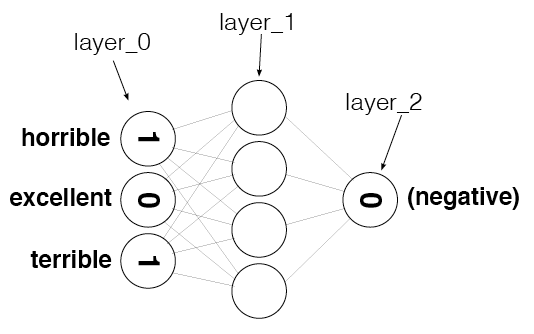

In [1]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [ ]:
# TODO: Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
layer_0 = None

Run the following cell. It should display `(1, 74074)`

In [ ]:
layer_0.shape

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [ ]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [ ]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # TODO: count how many times each word is used in the given review and store the results in layer_0 

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [ ]:
update_input_layer(reviews[0])
layer_0

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [ ]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [ ]:
labels[0]

In [ ]:
get_target_for_label(labels[0])

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [ ]:
labels[1]

In [ ]:
get_target_for_label(labels[1])

# End of Project 2. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Project 3: Building a Neural Network<a id='project_3'></a>

**TODO:** We've included the framework of a class called `SentimentNetork`. Implement all of the items marked `TODO` in the code. These include doing the following:
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

### Where to Get Help if You Need it
- Re-watch earlier Udacity lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (Check inside your classroom for a discount code)

In [ ]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = None
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = None
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        pass
                
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        pass
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        pass
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        pass

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            
            # TODO: Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            #       gradient descent and back propagation algorithms you 
            #       learned in class.
            
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        pass


Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

In [ ]:
mlp.train(reviews[:-1000],labels[:-1000])

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, `0.001`, and then train the new network.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

With a learning rate of `0.001`, the network should finally have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# End of Project 3. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Understanding Neural Noise<a id='lesson_4'></a>

The following cells include includes the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [ ]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [ ]:
layer_0

In [ ]:
review_counter = Counter()

In [ ]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [ ]:
review_counter.most_common()

# Project 4: Reducing Noise in Our Input Data<a id='project_4'></a>

**TODO:** Attempt to reduce the noise in the input data like Andrew did in the previous video. Specifically, do the following:
* Copy the `SentimentNetwork` class you created earlier into the following cell.
* Modify `update_input_layer` so it does not count how many times each word is used, but rather just stores whether or not a word was used. 

In [ ]:
# TODO: -Copy the SentimentNetwork class from Projet 3 lesson
#       -Modify it to reduce noise, like in the video 

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 4. 
## Andrew's solution was actually in the previous video, so rewatch that video if you had any problems with that project. Then continue on to the next lesson.
# Analyzing Inefficiencies in our Network<a id='lesson_5'></a>
The following cells include the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
layer_0 = np.zeros(10)

In [ ]:
layer_0

In [ ]:
layer_0[4] = 1
layer_0[9] = 1

In [ ]:
layer_0

In [ ]:
weights_0_1 = np.random.randn(10,5)

In [ ]:
layer_0.dot(weights_0_1)

In [ ]:
indices = [4,9]

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [ ]:
layer_1

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [ ]:
layer_1

# Project 5: Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, you can do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Remove the `update_input_layer` function - you will not need it in this version.
* Modify `init_network`:
>* You no longer need a separate input layer, so remove any mention of `self.layer_0`
>* You will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like you did in `train`, you will need to pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 4 lesson
#       -Modify it according to the above instructions 

Run the following cell to recreate the network and train it once again.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 5. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.
# Further Noise Reduction<a id='lesson_6'></a>

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

In [ ]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [ ]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. Specifically, do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but we are moving it into the class like we did with other helper code earlier.)
>* Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this to your solution if you would like.  
>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`
* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when you call `pre_process_data`

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 5 lesson
#       -Modify it according to the above instructions 

Run the following cell to train your network with a small polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance. It should be 

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Run the following cell to train your network with a much larger polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 6. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [ ]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [ ]:
mlp_full.train(reviews[:-1000],labels[:-1000])

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [ ]:
get_most_similar_words("excellent")

In [ ]:
get_most_similar_words("terrible")

In [ ]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [ ]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [ ]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words